In [65]:

from math import sin,cos
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



def solve(f,y0,interval,steps,*args,order=1):
    """ Solve ODE by Euler or Runge-Kutta methods, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(y,x)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    *args: optional arguments to be called in f
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta)
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    # Determine if order is 1 and proceed using Euler's method 
    
    (a,b) = interval
    h = (b-a)/steps # Size of a single step
    y = y0          # Initial condition

    xpoints = np.arange(a,b,h) # Independent variable
    ypoints = [] # Array for dependent variable
    
    if order == 1:  
        
        for x in xpoints: 
            ypoints.append(y)
            y += h*f(y,x,*args)
            
    elif order == 2:
        
        for x in xpoints:
            ypoints.append(y)
            k1 = h*f(y,x,*args)
            k2 = h*f(y+0.5*k1,x+0.5*h,*args)
            y += k2
    
    elif order == 4:
        
        for x in xpoints:
            ypoints.append(y)
            k1 = h*f(y,x,*args)
            k2 = h*f(y+0.5*k1,x+0.5*h,*args)
            k3 = h*f(y+0.5*k2,x+0.5*h,*args)
            k4 = h*f(y+k3,x+h,*args)
            y += (k1+2*k2+2*k3+k4)/6
            
    
    return xpoints,ypoints

Lab Exercises

[CUT] Newman 8.2 - The Lotka-Volterra equations

[CUT] Newman 8.3 - The Lorenz equations

Newman 8.4 - The non-linear pendulum

Newman 8.5 - The driven pendulum

The cuts are chosen so we don't need to work with coupled equations yet. Instead we will focus on the pendulum problem. Keep those additional problems in mind for a Final Project.

Do Newman's Exercises 8.4 and 8.5 in a lab format. This means your work needs to begin with a introduction to the problem. Explain the basic physics as in Example 8.6 (choose your own words). Explain the graphs clearly.

Do these in a separate notebook so it can be graded separately from Weekly Session 9.

In order to solve Newman 8.4-8.5, you will need to solve a system of coupled ODE's one way, or another. Here is my code to do so

In [124]:

def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            print(order)
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points

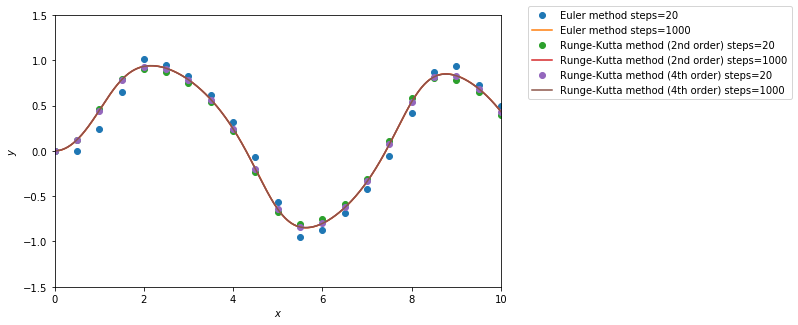

In [54]:
interval = (0.,10.)
r0 = [0.]

#set up plot
#plot the step size vs. error
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

#more efficient way to do this
i=0
        
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(*interval)
ax.set_ylim(-1.5,1.5)


for order in [1,2,4]:
    # obtain solutions with different step sizes
    for steps in [20,1000]:  # Newman used [10,20,50,100]
        
        results = []    # to hold results with different step sizes

        solution = solve_coupled(f_Newman_8_7_vec,1,r0,interval,steps,order=order)
        results.append(solution)

        # plot results

        if (order == 1):
            label = "Euler method"
        elif (order == 2):
            label = "Runge-Kutta method (2nd order)"
        elif (order == 4):
            label = "Runge-Kutta method (4th order)"
            
        if steps == 20:
            style='o'
        else:
            style='-'

        label = label + " steps=%d"%(steps)
        #for solution in results:
        plt.plot(solution[:,0],solution[:,1],style,label=label)
            
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()

Text(0,0.5,'theta(rad)')

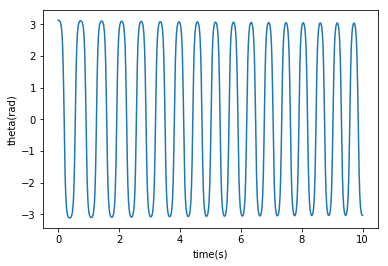

In [62]:
#constants
g= 9.81  #units of m/s^2
l= 0.01  #length of the pendulum arm, units of m

theta0= 179*(math.pi/180) # initial condition
omega0= 0
r0= (theta0,omega0)
interval= np.array([0,10],float)

def pendulum(t,r):
    theta= r[0]
    omega= r[1]
    ftheta= omega
    fomega= -(g/l)*sin(theta)
    return np.array([ftheta,fomega],float)

rtpoints= solve_coupled(pendulum,2,r0,interval,1000,order=4)
r= rtpoints[:,1]
t= rtpoints[:,0]

plt.plot(t,r)
plt.xlabel("time(s)")
plt.ylabel("theta(rad)")

## Exercise 8.5


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


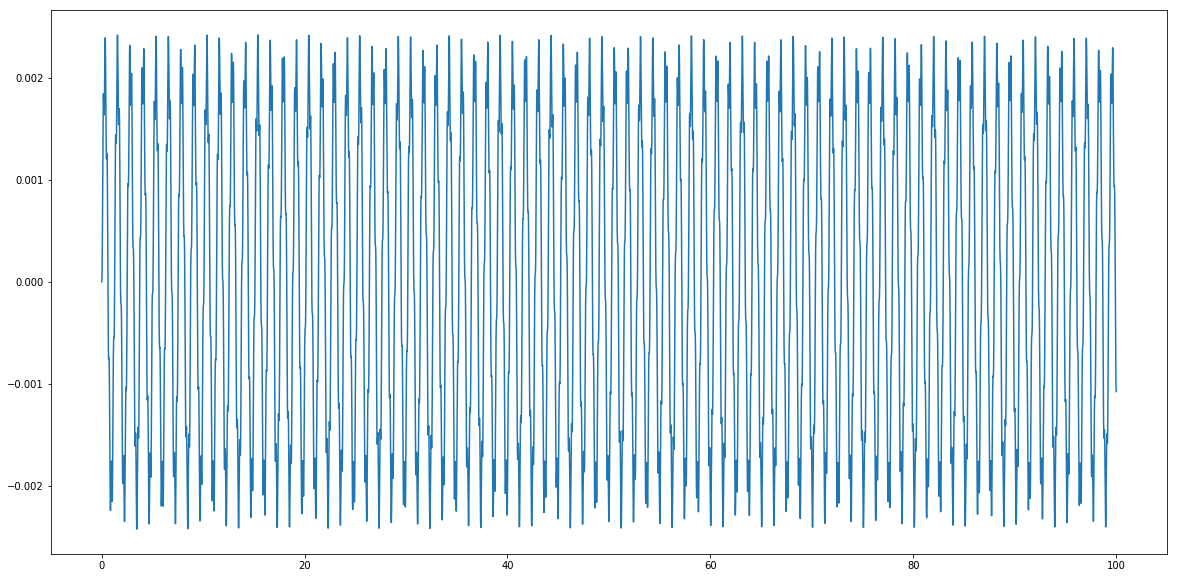

In [130]:
#Constants 
C= 2.0                                           #units of s^-2
bigOmega= 5                                 #units of s^-1
driven_interval= np.array([0.0,100.0],float)               # time interval in seconds

initTheta= 0.0*(math.pi/180)                              # inital condition for theta
initOmega= 0.0                                  # initial condition ofr omega 
r0= [initTheta,initOmega]                    # inital conditions set as a vector




def driven_pen(t,r,C,bigOmega):
    #print(C)
    #print(bigOmega)
    #print ("time is ",t)
    dtheta= r[0]
    domega= r[1]
    ftheta= domega
    fomega= -(g/l)*sin(dtheta) + C*cos(dtheta)*sin(bigOmega*t)
    return np.array ([ftheta,fomega],float)



rtpoints1= solve_coupled(driven_pen,2,r0,driven_interval,10000,C,bigOmega,order=4)

r1= rtpoints1[:,1]
t1= rtpoints1[:,0]

plt.figure(figsize=(20, 10))
plt.plot(t1,r1)